**Libraries required for task**

In [50]:
import os 
import zipfile 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve




**Path Setup**

In [51]:
dataset_csv=pd.read_csv("/content/heart.csv") # reading dataset CSV
dataset_csv.head() #printing first 5 values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Attribute Information:

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

[Dataset Link](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

In [52]:
dataset_csv.info() #reading dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [53]:
dataset_csv.describe() #description of the data in the DataFrame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [54]:
dataset_csv['target'].value_counts() #object containing counts of unique values

1    165
0    138
Name: target, dtype: int64

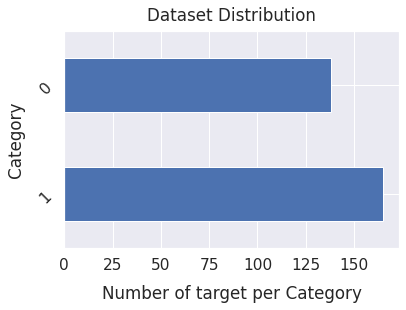

In [55]:
import seaborn as sns
sns.set(font_scale=1.4)
dataset_csv['target'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of target per Category", labelpad=12)
plt.ylabel("Category", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [56]:
dataset_csv = shuffle(dataset_csv) 
dataset_csv.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0


In [57]:
target = dataset_csv['target']                  # target
target.head()


69     1
211    0
302    0
65     1
191    0
Name: target, dtype: int64

In [58]:
features = dataset_csv.drop('target', axis = 1) 
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3


In [85]:
col_names = features.columns
scaler = preprocessing.StandardScaler() #StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.
features = scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) #data,column
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.841908,-1.468418,-0.938515,-0.435415,-0.720145,-0.417635,0.898962,0.583939,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
1,0.731619,0.681005,-0.938515,-0.663867,0.265454,-0.417635,0.898962,-0.421862,1.435481,2.208842,-0.649113,0.265082,1.123029
2,0.290464,-1.468418,0.032031,-0.092738,-0.198357,-0.417635,-1.005832,1.064975,-0.696631,-0.896862,-0.649113,0.265082,-0.512922
3,-2.135891,-1.468418,-0.938515,0.364165,-1.222608,-0.417635,0.898962,1.414819,-0.696631,0.310912,0.976352,-0.714429,-0.512922
4,0.400752,0.681005,-0.938515,-0.206964,-0.584867,-0.417635,-1.005832,-0.815437,1.435481,1.001069,-0.649113,2.224104,1.123029


In [60]:

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2) # 80:20 split 

target: 0= less chance of heart attack 1= more chance of heart attack

In [61]:
labels=["less chance","more chance"]
acc_on_test_set=[]
acc_on_train_set=[]
model_name=[]

In [62]:
def fun_confusion_matrix(target_test, y_pred):

  cn=confusion_matrix(target_test, y_pred)
  df_cm = pd.DataFrame(cn, index = [i for i in labels],
                    columns = [i for i in labels])
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm, annot=True,fmt="d")

In [63]:
def fun_classification_report(target_test, y_pred):
  print('Classification Report')
  print(classification_report(target_test, y_pred, target_names=labels))

**KNeighborsRegressor**

In [64]:
k = 5
kf = KFold(n_splits=k, random_state=None)
neigh = KNeighborsClassifier(n_neighbors=7,weights='distance',metric='manhattan')
neigh.fit(features_train,target_train)


result = cross_val_score(neigh , features_train,target_train, cv = kf)
acc_on_train_set.append(result.mean())
print("Avg accuracy: {}".format(result.mean()))


Avg accuracy: 0.8388605442176871


In [65]:
acc_on_test_set.append(neigh.score(features_test,target_test))
model_name.append("KNN")
y_pred=neigh.predict(features_test)
fun_classification_report(target_test,y_pred)

Classification Report
              precision    recall  f1-score   support

 less chance       0.81      0.88      0.85        25
 more chance       0.91      0.86      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [66]:
y_pred = neigh.predict(features_train)

knntrainfpr, knntraintpr, knntrainthreshold = roc_curve(target_train, y_pred)

y_pred = neigh.predict(features_test)

knntestfpr, knntesttpr, knntestthreshold = roc_curve(target_test, y_pred)

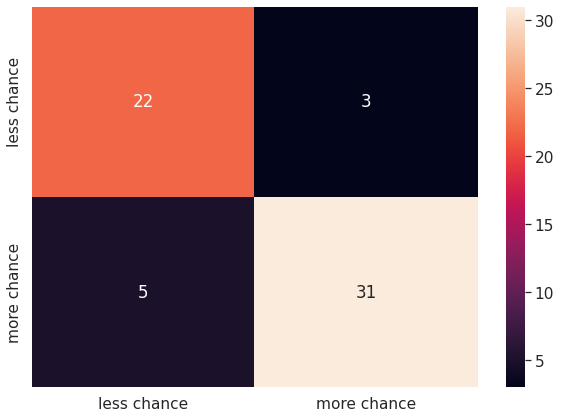

In [67]:
fun_confusion_matrix(target_test,y_pred)

**MLP**

In [68]:
k = 5
kf = KFold(n_splits=k, random_state=None)
mlp = MLPClassifier(activation = 'relu', solver = 'adam', max_iter = 2600, alpha = 0.0001)
mlp.fit(features_train,target_train)


result = cross_val_score(mlp , features_train,target_train, cv = kf)
acc_on_train_set.append(result.mean())
print("Avg accuracy: {}".format(result.mean()))


Avg accuracy: 0.7854591836734695


In [69]:
acc_on_test_set.append(mlp.score(features_test,target_test))
model_name.append("MLP")
y_pred=mlp.predict(features_test)
fun_classification_report(target_test,y_pred)


Classification Report
              precision    recall  f1-score   support

 less chance       0.77      0.92      0.84        25
 more chance       0.94      0.81      0.87        36

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



In [70]:
y_pred = mlp.predict(features_train)

mlptrainfpr, mlptraintpr, mlptrainthreshold = roc_curve(target_train, y_pred)

y_pred = mlp.predict(features_test)

mlptestfpr, mlptesttpr, mlptestthreshold = roc_curve(target_test, y_pred)

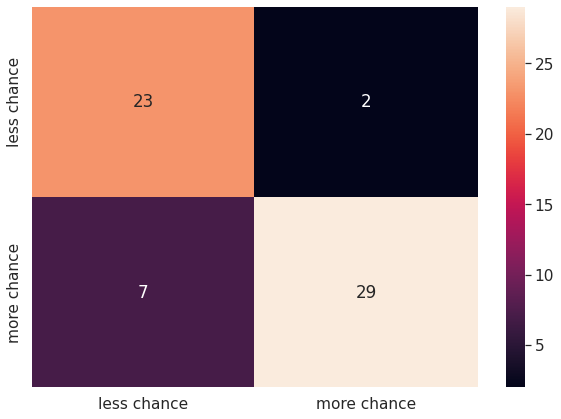

In [71]:
fun_confusion_matrix(target_test,y_pred)

**AdaBoost**

In [72]:
k = 5
kf = KFold(n_splits=k, random_state=None)
ada_boost = AdaBoostClassifier(n_estimators=250,learning_rate=0.01)
ada_boost.fit(features_train,target_train)


result = cross_val_score(ada_boost , features_train,target_train, cv = kf)
acc_on_train_set.append(result.mean()) 
print("Avg accuracy: {}".format(result.mean()))


Avg accuracy: 0.79328231292517


In [73]:
acc_on_test_set.append(ada_boost.score(features_test,target_test))
model_name.append("AdaBoost")
y_pred=ada_boost.predict(features_test)
fun_classification_report(target_test,y_pred)


Classification Report
              precision    recall  f1-score   support

 less chance       0.85      0.92      0.88        25
 more chance       0.94      0.89      0.91        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [74]:
y_pred = ada_boost.predict(features_train)

ada_boosttrainfpr, ada_boosttraintpr, ada_boosttrainthreshold = roc_curve(target_train, y_pred)

y_pred = ada_boost.predict(features_test)

ada_boosttestfpr, ada_boosttesttpr, ada_boosttestthreshold = roc_curve(target_test, y_pred)

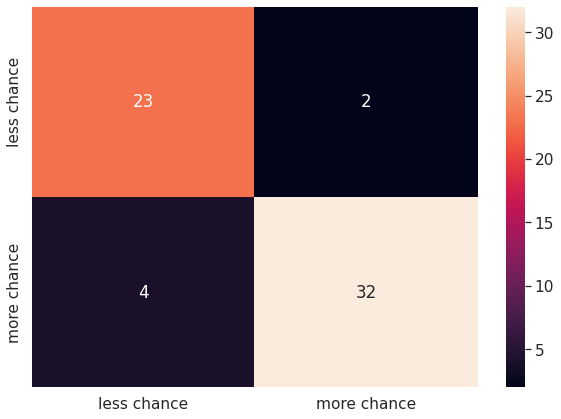

In [75]:
fun_confusion_matrix(target_test,y_pred)

**Random Forest**

In [76]:
k = 5
kf = KFold(n_splits=k, random_state=None)
random_forest = random_forest = RandomForestClassifier(n_estimators=100,max_features='auto',criterion='gini')
random_forest.fit(features_train,target_train)


result = cross_val_score(random_forest, features_train,target_train, cv = kf)
acc_on_train_set.append(result.mean()) 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8142006802721088


In [77]:
acc_on_test_set.append(random_forest.score(features_test,target_test))
model_name.append("RF")
y_pred=random_forest.predict(features_test)
fun_classification_report(target_test,y_pred)

Classification Report
              precision    recall  f1-score   support

 less chance       0.89      0.96      0.92        25
 more chance       0.97      0.92      0.94        36

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [78]:
y_pred = random_forest.predict(features_train)

random_foresttrainfpr, random_foresttraintpr, random_foresttrainthreshold = roc_curve(target_train, y_pred)

y_pred = random_forest.predict(features_test)

random_foresttestfpr, random_foresttesttpr, random_foresttestthreshold = roc_curve(target_test, y_pred)

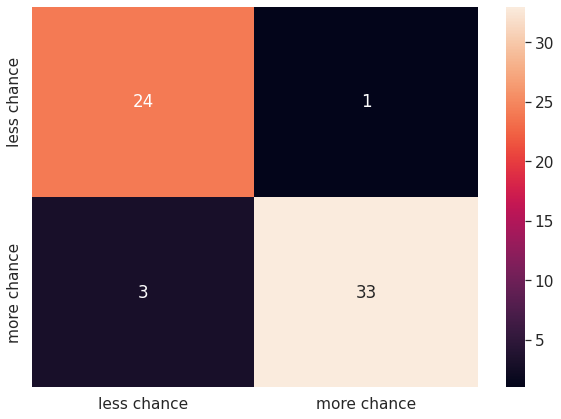

In [79]:
fun_confusion_matrix(target_test,y_pred)

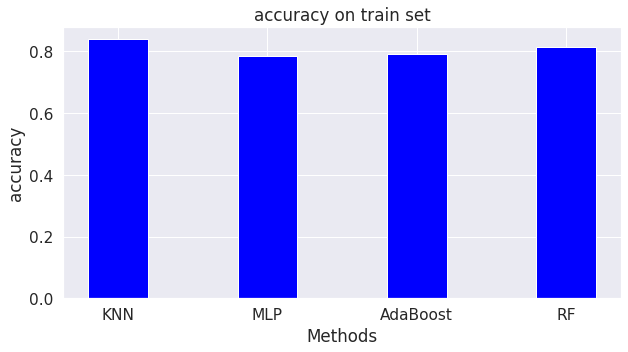

In [80]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(model_name, acc_on_train_set, color ='blue',
        width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("accuracy")
plt.title("accuracy on train set")
plt.show()




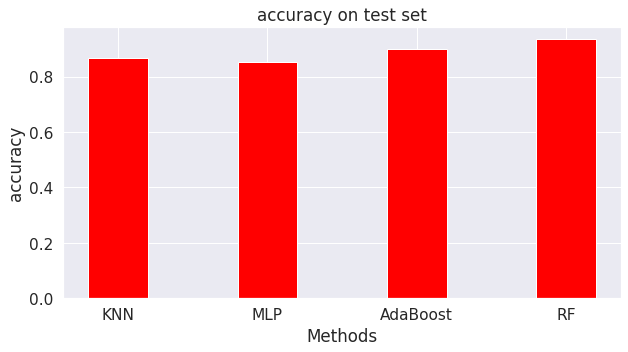

In [81]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(model_name, acc_on_test_set, color ='red',
        width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("accuracy")
plt.title("accuracy on test set")
plt.show()




In [82]:
print(" Model Name\t\t Training Accuracy\t Test Accuracy\t ")
for i in range(0,len(model_name)):
  print(" {}\t\t {}\t\t\t {}\t ".format(model_name[i].ljust(10, ' '),round(acc_on_train_set[i],3),round(acc_on_test_set[i],3)))


 Model Name		 Training Accuracy	 Test Accuracy	 
 KNN       		 0.839			 0.869	 
 MLP       		 0.785			 0.852	 
 AdaBoost  		 0.793			 0.902	 
 RF        		 0.814			 0.934	 


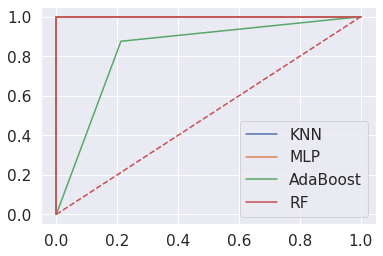

In [83]:
plt.figure()
plt.plot(knntrainfpr, knntraintpr, label = "KNN")
plt.plot(mlptrainfpr, mlptraintpr, label = "MLP")
plt.plot(ada_boosttrainfpr, ada_boosttraintpr, label = "AdaBoost")
plt.plot(random_foresttrainfpr, random_foresttraintpr, label = "RF")
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(loc="best")
plt.show()

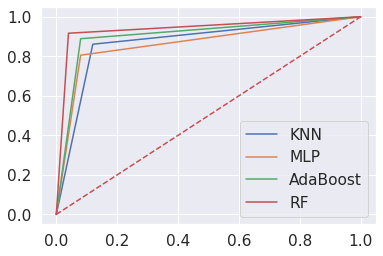

In [84]:
plt.figure()
plt.plot(knntestfpr, knntesttpr, label = "KNN")
plt.plot(mlptestfpr, mlptesttpr, label = "MLP")
plt.plot(ada_boosttestfpr, ada_boosttesttpr, label = "AdaBoost")
plt.plot(random_foresttestfpr, random_foresttesttpr, label = "RF")
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(loc="best")
plt.show()